# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [17]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata

In [18]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 1234004
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [19]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_mldata("MNIST original")
# rescale the data
X, y = mnist.data / 255., mnist.target

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [20]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([43, 51, 45, 57, 51, 39, 51, 54, 53, 56]))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [21]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


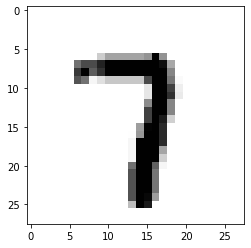

LABEL: 7
INPUT:


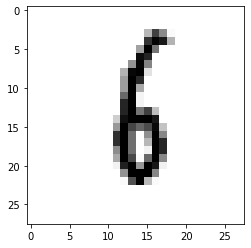

LABEL: 6


In [22]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [23]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data
clf = GridSearchCV(linear_SVM, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

results = clf.cv_results_
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

# parameters for poly with degree 2 kernel
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
clf_poly2 = GridSearchCV(poly2_SVM, parameters)
clf_poly2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

results = clf_poly2.cv_results_
print("Best parameters set found:", clf_poly2.best_params_)
print("Score with best parameters:", clf_poly2.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

# parameters for rbf SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
clf_rbf = GridSearchCV(rbf_SVM, parameters)
clf_rbf.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

results = clf_rbf.cv_results_
print("Best parameters set found:", clf_rbf.best_params_)
print("Score with best parameters:", clf_rbf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RESULTS FOR LINEAR KERNEL

Best parameters set found: {'C': 1}
Score with best parameters: 0.848

All scores on the grid: [0.372 0.83  0.846 0.848 0.848 0.848]


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found: {'C': 0.001, 'gamma': 1.0}
Score with best parameters: 0.848

All scores on the grid: [0.138 0.33  0.848 0.138 0.802 0.848 0.33  0.848 0.848 0.802 0.848 0.848
 0.848 0.848 0.848 0.848 0.848 0.848]


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR rbf KERNEL

Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.872

All scores on the grid: [0.142 0.12  0.114 0.142 0.12  0.114 0.288 0.12  0.114 0.858 0.424 0.114
 0.872 0.464 0.116 0.872 0.464 0.116]


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [24]:
#get training and test error for the best SVM model from CV
best_SVM = clf_rbf.best_estimator_

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.104719


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [25]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error = 1. - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv = 5)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)

print ("Best logistic regression with CV training error: %f" % training_error_cv)
print ("Best logistic regression with CV test error: %f" % test_error_cv)

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.162748


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Best logistic regression with CV training error: 0.008000
Best logistic regression with CV test error: 0.161324


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

### Answer:
The model trained with SVM and rbf kernel gives a smaller test error than logistic regression.

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


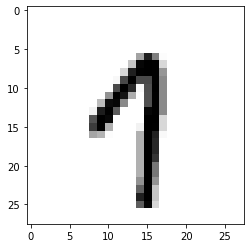

LABEL: 1
SVM prediction:  1.0
logistic regression prediction:  9.0


In [26]:
best_SVM_predictions = best_SVM.predict(X_train)
lr_predictions = lr_cv.predict(X_train)

for i in range(len(X_train)):
    if best_SVM_predictions[i] == y_train[i] and lr_predictions[i] != y_train[i]:
        plot_digit(X_train,y_train,i)
        print("SVM prediction: ", best_SVM_predictions[i])
        print("logistic regression prediction: ", lr_predictions[i])
        break

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

In [27]:
m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

In [28]:
# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data
clf = GridSearchCV(linear_SVM, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

results = clf.cv_results_
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

# parameters for poly with degree 2 kernel
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)
clf_poly2 = GridSearchCV(poly2_SVM, parameters)
clf_poly2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

results = clf_poly2.cv_results_
print("Best parameters set found:", clf_poly2.best_params_)
print("Score with best parameters:", clf_poly2.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

# parameters for rbf SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
clf_rbf = GridSearchCV(rbf_SVM, parameters)
clf_rbf.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

results = clf_rbf.cv_results_
print("Best parameters set found:", clf_rbf.best_params_)
print("Score with best parameters:", clf_rbf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RESULTS FOR LINEAR KERNEL

Best parameters set found: {'C': 0.01}
Score with best parameters: 0.88

All scores on the grid: [0.66  0.88  0.88  0.878 0.878 0.878]


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found: {'C': 0.001, 'gamma': 1.0}
Score with best parameters: 0.9

All scores on the grid: [0.211 0.601 0.9   0.211 0.883 0.899 0.601 0.9   0.899 0.883 0.899 0.899
 0.9   0.899 0.899 0.899 0.899 0.899]


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



RESULTS FOR rbf KERNEL

Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.911

All scores on the grid: [0.211 0.158 0.109 0.211 0.158 0.109 0.638 0.158 0.109 0.902 0.584 0.114
 0.911 0.621 0.114 0.911 0.621 0.114]


In [29]:
#get training and test error for the best SVM model from CV
best_SVM = clf_rbf.best_estimator_

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.083928


In [30]:
lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error = 1. - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv = 5)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)

print ("Best logistic regression with CV training error: %f" % training_error_cv)
print ("Best logistic regression with CV test error: %f" % test_error_cv)

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.002000
Best logistic regression test error: 0.141812


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to c

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

Best logistic regression with CV training error: 0.006000
Best logistic regression with CV test error: 0.148377


## TO DO 7
Compare and comment on the differences with the results above.

With 1000 samples we get better results in all types of SVM and logistic regressions compared to 500 samples. Moreover, the best kernel for SVM is still RBF. The only difference in logistic regression is that we have slightly better results without cross validation, but the difference is not significant.